In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import io

# Load your CSV
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['FINAL_USO.csv']))
df = df.dropna(axis=1, how='all')  # drop any columns that are empty
df = df.set_index('Date') if 'Date' in df.columns else df  # use index if present

# Choose columns for forecasting (example: pick all price columns)
commodities = [col for col in df.columns if '_Price' in col or 'Close' in col or 'Adj' in col]
data = df[commodities].dropna()

Saving FINAL_USO.csv to FINAL_USO.csv


In [ ]:
# Scale all series 0-1 for best deep learning performance
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [ ]:
def create_sequences(data, lookback=10):
    X, y = [], []
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

lookback = 100  # last 10 days to predict the next day
X, y = create_sequences(data_scaled, lookback)

# Train/test split (e.g., 80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential([
    LSTM(64, input_shape=(lookback, len(commodities))),
    Dropout(0.1),
    Dense(len(commodities))  # One output per commodity
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.1242 - val_loss: 0.0281
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0127 - val_loss: 0.0223
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0091 - val_loss: 0.0178
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0076 - val_loss: 0.0163
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0067 - val_loss: 0.0124
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0060 - val_loss: 0.0102
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0051 - val_loss: 0.0073
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0039 - val_l

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


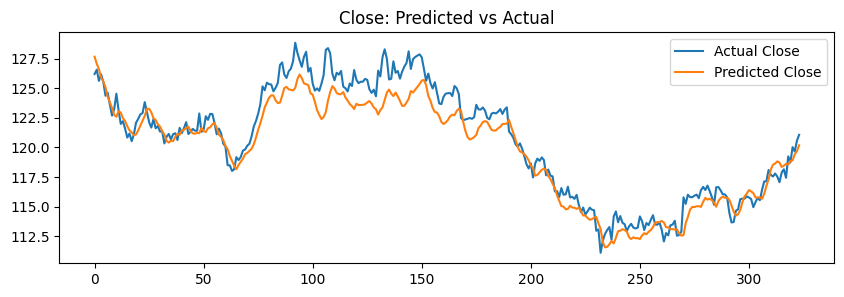

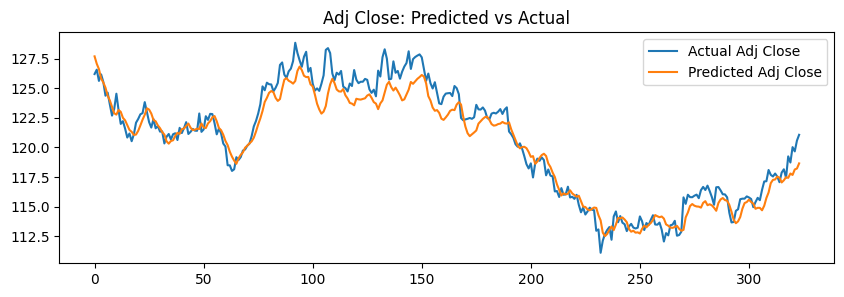

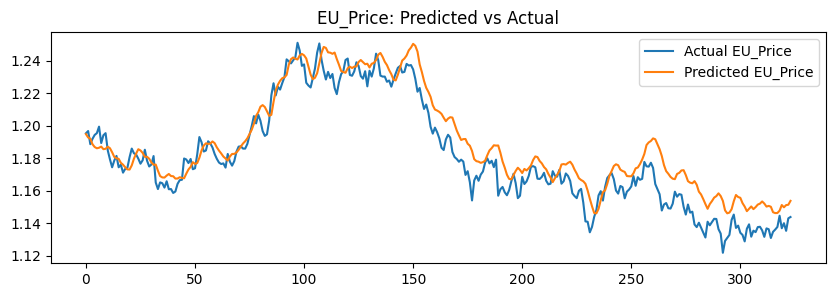

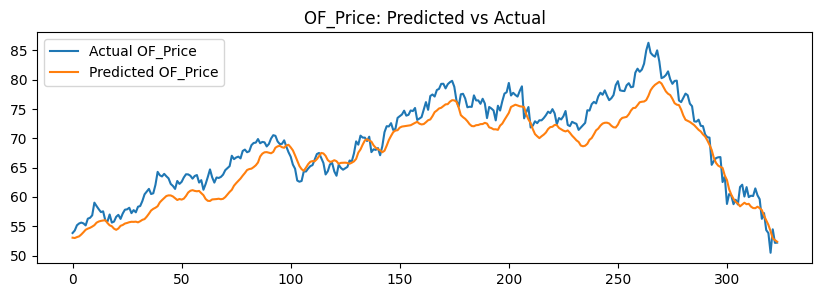

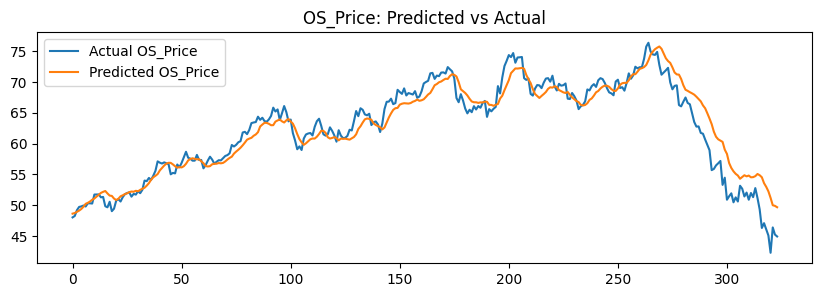

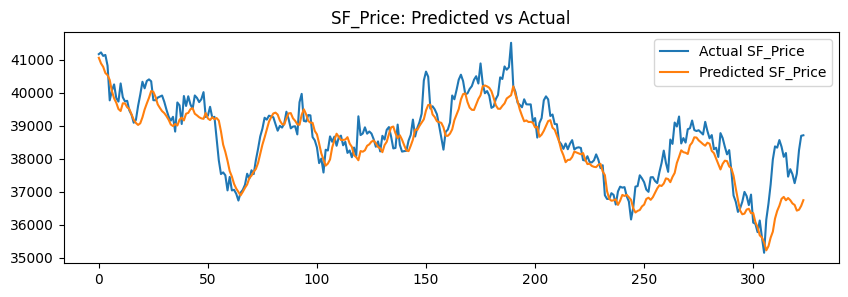

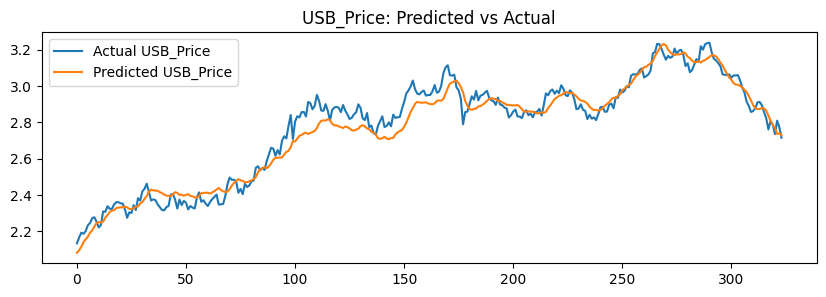

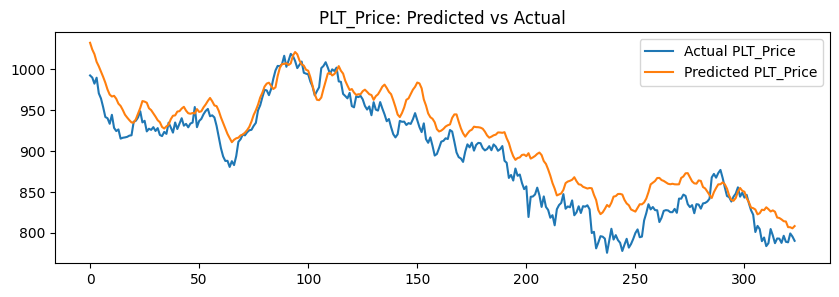

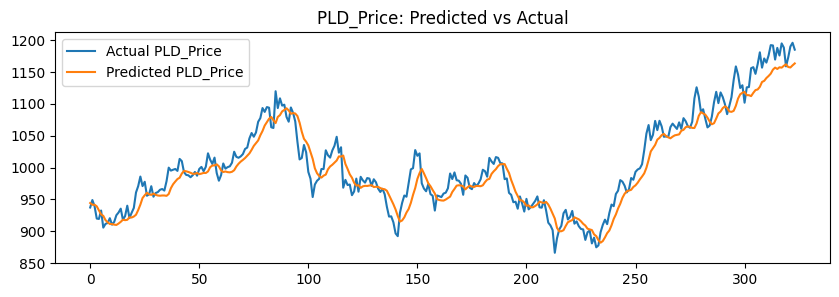

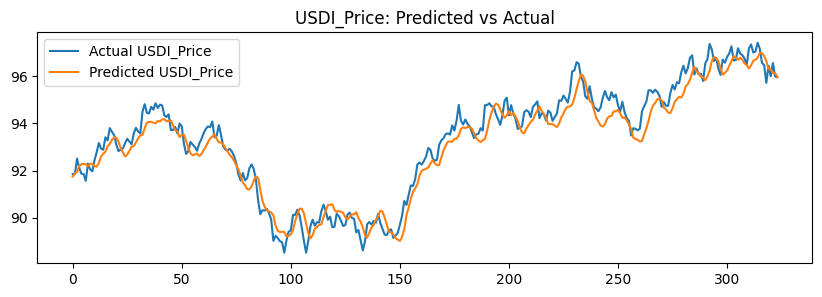

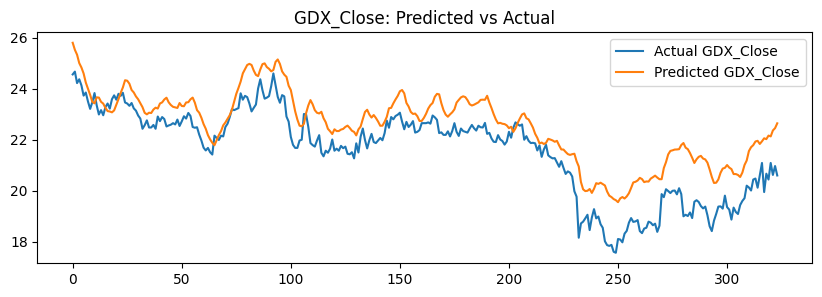

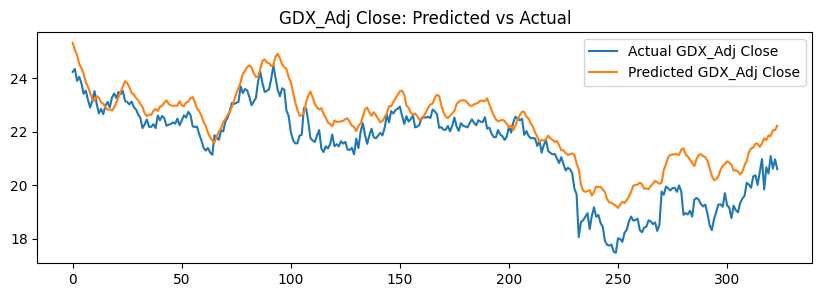

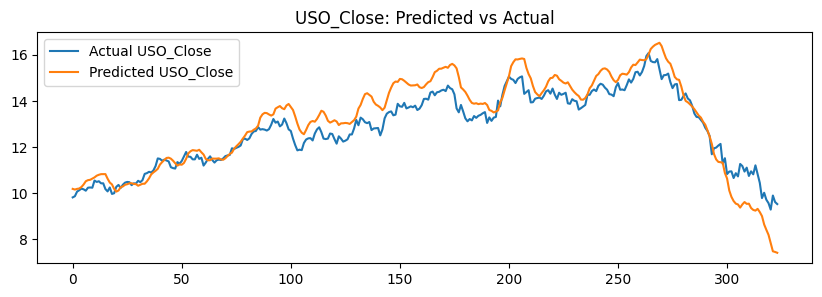

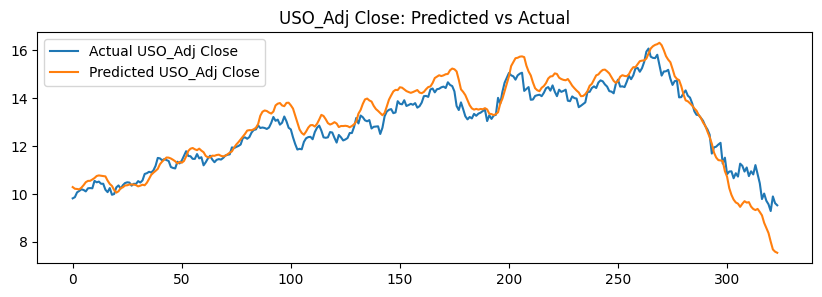

In [ ]:
# Predict on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

import matplotlib.pyplot as plt
for i, col in enumerate(commodities):
    plt.figure(figsize=(10,3))
    plt.plot(y_true[:, i], label=f'Actual {col}')
    plt.plot(y_pred[:, i], label=f'Predicted {col}')
    plt.title(f'{col}: Predicted vs Actual')
    plt.legend()
    plt.show()


### 1. Save your notebook
Make sure you've saved the latest version of your notebook. You can do this from the `File` menu -> `Save`.

### 2. Initialize a git repository
If you haven't already, you'll need to initialize a git repository in your Colab environment.

In [1]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


### 3. Add your notebook file to the repository
Use the `git add` command to add your notebook file to the staging area. Replace `your_notebook_name.ipynb` with the actual name of your notebook.

In [4]:
!git add 'CommodityPrice.ipynb'

fatal: pathspec 'CommodityPrice.ipynb' did not match any files


### 4. Commit your changes
Commit the added file with a message describing the changes.

In [ ]:
!git commit -m "Add notebook with commodity price prediction model"

### 5. Add a remote repository
You'll need to add a remote repository to push your code to. Replace `your_username` and `your_repository_name` with your GitHub username and the name of your repository.

In [ ]:
!git remote add origin https://github.com/your_username/your_repository_name.git

### 6. Push your changes to GitHub
Finally, push your committed changes to the remote repository.

In [ ]:
!git push -u origin master